In [1]:
# Collect logs.
#ffmpeg -loglevel debug -i '03. Klyuch.avi' -vf mpdecimate -f null - 2>witch.log
#egrep 'Parsed_mpdecimate.* (keep|drop)' witch.log > witch-mpd.log

In [2]:
# Settings.
LINES = !cat witch-mpd.log
TITLE = 'W.I.T.C.H. Ep03S01'
CONTAINER_FPS = 25
OP = [60]
ED = [21*60+9]
MAX_POINTS = 250

In [3]:
# Prepare data.
fps = int(round(CONTAINER_FPS))
groups = [ LINES[i:i+fps] for i in range(0, len(LINES), fps) ]
get_group_uniq_frames = lambda group: sum(1 if ' keep ' in line else 0 for line in group)
xs = range(1, len(groups) + 1)
ys = [ get_group_uniq_frames(group) for group in groups ]
avg_ys = sum(ys)/len(ys)
if len(xs) > MAX_POINTS:
    ratio = int(len(xs) / MAX_POINTS)
    xs = xs[::ratio]
    ys = ys[::ratio]

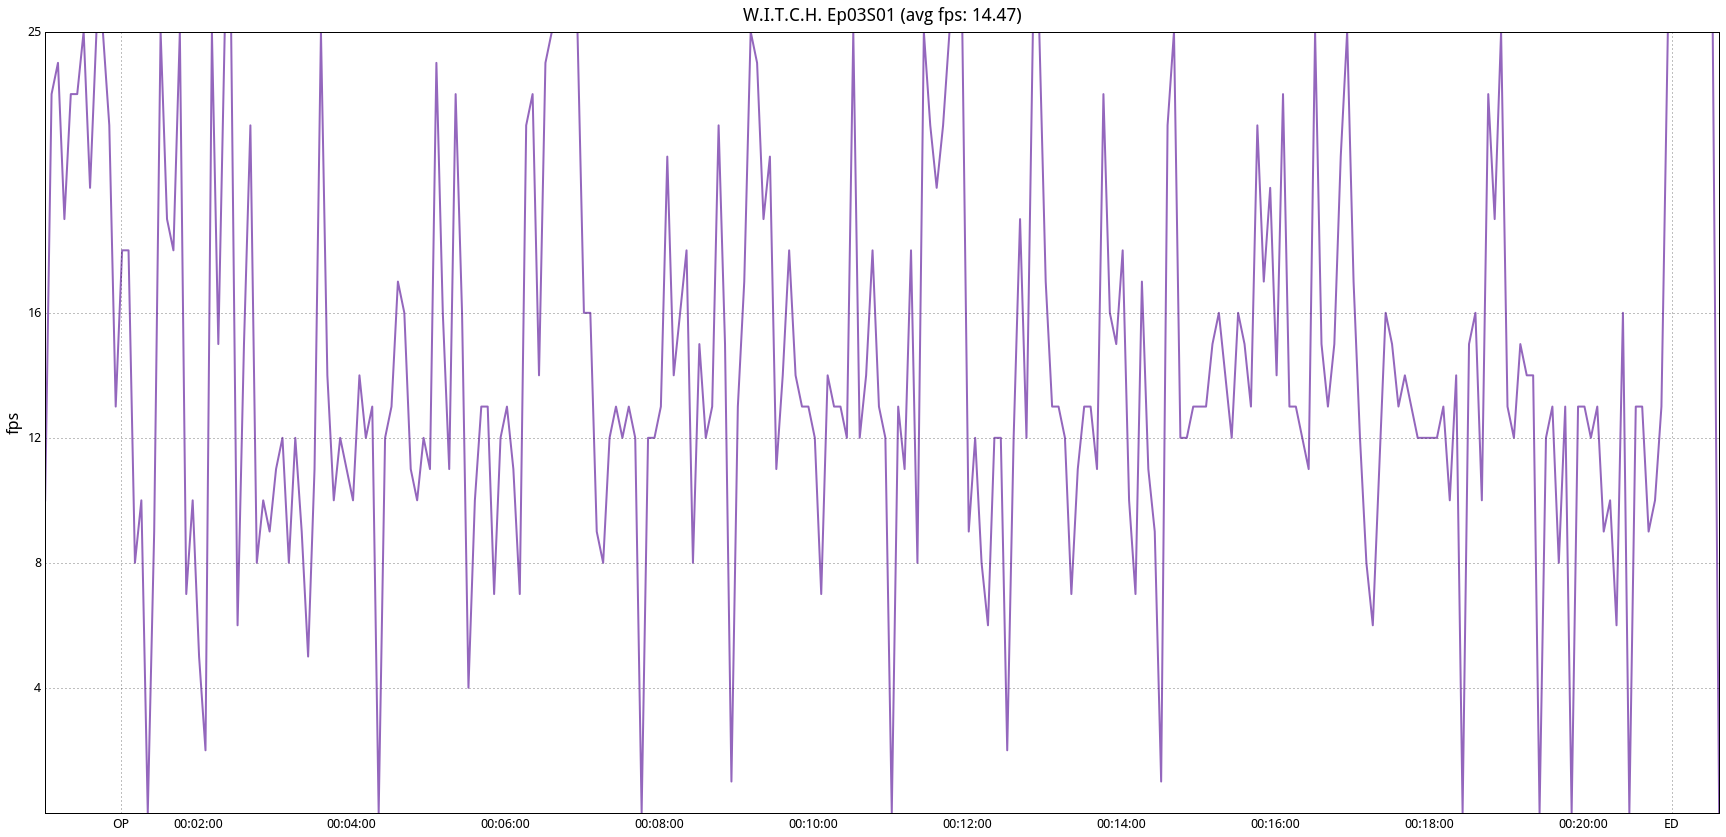

In [4]:
# Draw graph.
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
fig, ax = plt.subplots(figsize=(30,14), facecolor='w')
ax.set_xlim(1, xs[-1])
ax.set_ylim(top=round(fps))
colors = [
    (31, 119, 180), (255, 127, 14), (174, 199, 232), (255, 187, 120), 
    (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
    (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),            
    (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),          
    (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229), 
]
colors = [ (r/255, g/255, b/255) for r, g, b in colors ]
ax.plot(xs, ys, lw=2, color=colors[8])
ax.set_ylabel('fps', size=17)
ax.tick_params(size=0, labelsize=13)
def timestamp(t, pos):
    t = int(t)
    if t in OP: return 'OP'
    if t in ED: return 'ED'
    return '{:02d}:{:02d}:{:02d}'.format(t//3600, t%3600//60, t%60)
fmt = mticker.FuncFormatter(timestamp)
ax.xaxis.set_major_formatter(fmt)
ax.set_xticks([60*n for n in range(2, 22, 2)]+OP+ED)
ax.set_yticks([4, 8, 12, 16, 25])
ax.grid()
[ l.set_visible(False) for l in ax.get_xgridlines()[:-(len(OP)+len(ED))] ]
title = TITLE + ' (avg fps: {:.2f})'.format(avg_ys)
ax.set_title(title, size=18, y=1.008);